In [1]:
import pandas as pd
import numpy as nd
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns


In [2]:
Matrix2 = pd.read_csv( r'C:\Users\tornt\exe\intro_homework\Sec dataset\movement-range-data-2020-03-01--2020-12-31.txt', delimiter = "\t")

C:\Users\tornt\AppData\Local\Temp\ipykernel_17468\597823814.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Matrix2 = pd.read_csv( r'C:\Users\tornt\exe\intro_homework\Sec dataset\movement-range-data-2020-03-01--2020-12-31.txt', delimiter = "\t")


In [3]:
df3=Matrix2

In [4]:
gdf_AUS = gpd.read_file('gadm41_AUS_2.shp')
gdf_ITA = gpd.read_file('gadm41_ITA_2.shp')
gdf_ZAF = gpd.read_file('gadm41_ZAF_2.shp')
gdf_CAN = gpd.read_file('gadm41_CAN_2.shp')

In [16]:
# Read the shapefile
gdf_THA = gpd.read_file('gadm41_THA_2.shp')

In [6]:
# Select countries and dates
# selected_countries = ['CAN', 'ITA', 'ZAF', 'AUS', 'THA']
selected_countries = ['THA']
selected_dates = ['2020-04-25', '2020-07-01']
# selected_dates = ['2020-04-25', '2020-04-26']

In [17]:
# Filter data
filtered_df = df3[(df3['country'].isin(selected_countries)) & (df3['ds'].isin(selected_dates))]

map_df1 = gdf_THA.merge(filtered_df[filtered_df['ds'] == str(selected_dates[0])], how='left', left_on='GID_2', right_on='polygon_id')
map_df2 = gdf_THA.merge(filtered_df[filtered_df['ds'] == str(selected_dates[1])], how='left', left_on='GID_2', right_on='polygon_id')

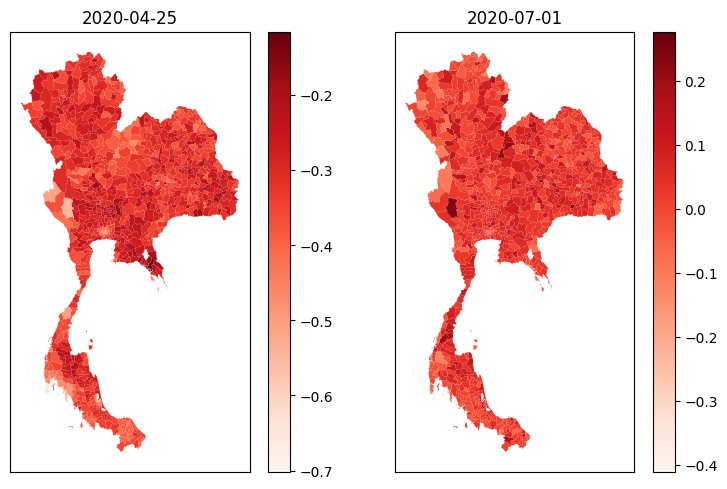

In [18]:
fig , axs = plt.subplots(1,2,figsize=(8,5))
map_df1.plot(column=map_df1['all_day_bing_tiles_visited_relative_change'],legend=True,cmap='Reds',ax=axs[0])
map_df2.plot(column=map_df2['all_day_bing_tiles_visited_relative_change'],legend=True,cmap='Reds',ax=axs[1])
axs[0].set_title('2020-04-25')
axs[1].set_title('2020-07-01')
axs[1].set_xticks([])
axs[0].set_xticks([])
axs[1].set_yticks([])
axs[0].set_yticks([])
plt.tight_layout()
plt.show()

In [52]:
def plot_country_gdf(country_gdf, main_df, country, dates):
    fig, axs = plt.subplots(1, len(dates), figsize=(8 * len(dates), 5))

    if len(dates) == 1:  # Ensure axs is iterable when only one date is selected
        axs = [axs]

    # Filtering data by country and selected dates
    filtered_df = main_df[(main_df['country'] == country) & (main_df['ds'].isin(dates))]

    for i, date in enumerate(dates):
        map_df = country_gdf.merge(filtered_df[filtered_df['ds'] == date], how='left', left_on='GID_2', right_on='polygon_id')
        map_df.plot(column=map_df['all_day_bing_tiles_visited_relative_change'], legend=True, cmap='Reds', ax=axs[i])
        axs[i].set_title(f"{country} - {date}")
        axs[i].set_xticks([])
        axs[i].set_yticks([])

    plt.tight_layout()
    plt.show()

In [43]:
country_gdfs = {
    'AUS': gdf_AUS,
    'ITA': gdf_ITA,
    'ZAF': gdf_ZAF,
    'CAN': gdf_CAN,
    'THA': gdf_THA
}

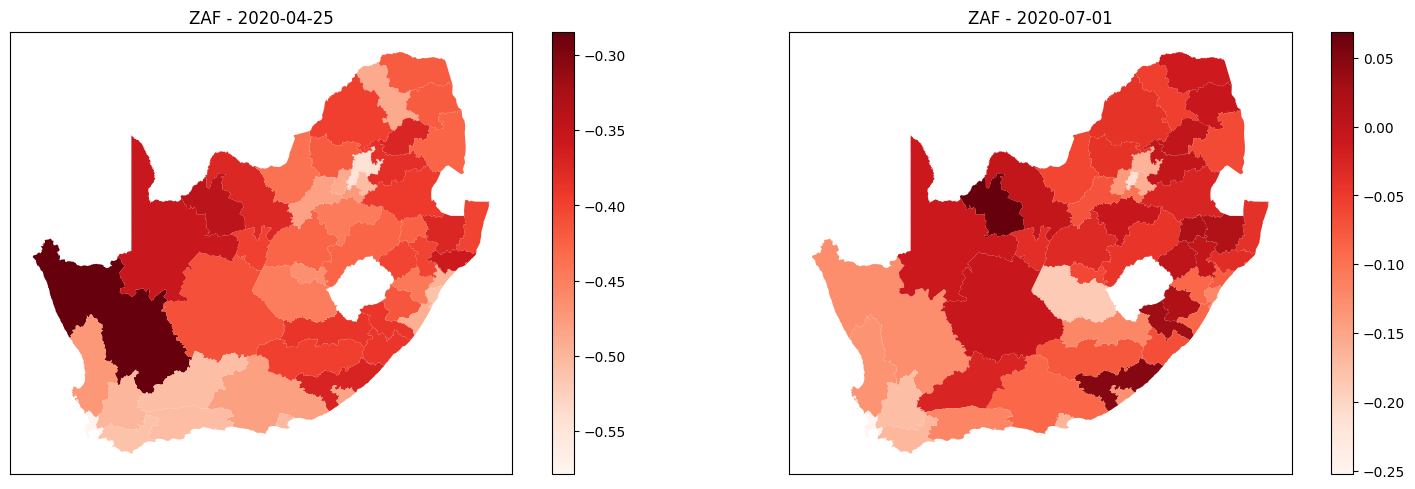

In [57]:
selected_countries = ['THA']  # Example list of countries
selected_dates = ['2020-04-25', '2020-07-01']  # Example list of dates

plot_country_gdf(gdf_ZAF, df3, 'ZAF', selected_dates)